In [9]:
import math
import numpy as np
import cv2 as cv
from cvzone.HandTrackingModule  import HandDetector
import warnings
warnings.filterwarnings("ignore")
import cvzone
import random
import time

In [4]:
import matplotlib.pyplot as plt

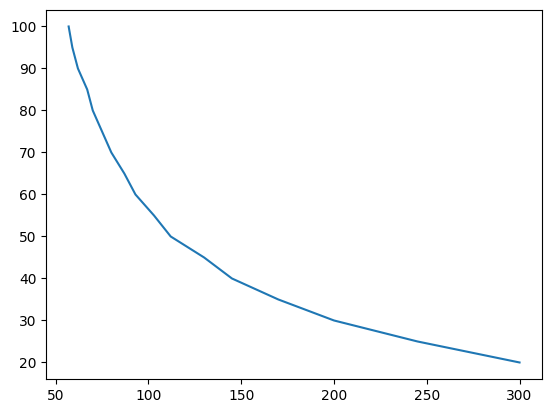

In [5]:
x = [300, 245, 200, 170, 145, 130, 112, 103, 93, 87, 80, 75, 70, 67, 62, 59, 57]
y = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

plt.plot(x, y)

# x- Actual Distance
# y- Distance in cm

In [16]:
cam = cv.VideoCapture(0)
cam.set(3, 1280)
cam.set(4, 720)
detector = HandDetector(detectionCon = 0.8, maxHands = 1)

x = [300, 245, 200, 170, 145, 130, 112, 103, 93, 87, 80, 75, 70, 67, 62, 59, 57]
y = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
coff = np.polyfit(x, y, 2)

bx, by = 250, 250
color = (0, 0, 0)
counter = 0
score = 20
timestart = time.time()
totalTime = 2
while True:
    _, img = cam.read()
    img = cv.flip(img, 1)

    if time.time() - timestart < totalTime:
        
        hands, img = detector.findHands(img, draw=False)
        if hands:    # Finding width of hand by knowing the distance between points 5, 13. Visit MediaPipe site for more info 
            lmlist = hands[0]["lmList"]
            x, y, w, h = hands[0]['bbox']
            x1, y1 = lmlist[5][:2]
            x2, y2 = lmlist[17][:2]
            distance = math.sqrt((y2-y1)**2 + (x2-x1)**2)
            a, b, c = coff
            distancecm = a*distance**2 + b*distance + c
    
            if distancecm < 40:
                if x < bx < x+w and y < by < y+h:
                    counter = 1
                    
    
            
           
            cv.rectangle(img, (x,y), (x+w, y+h), (255, 0, 255), 3)
            cvzone.putTextRect(img, f'{int(distance)} cm', (x+5,y-10))
    
        if counter:
            counter +=1
            color = (0, 255, 0)
            if counter == 5:
                bx = random.randint(100, 1100)
                by = random.randint(100, 600)
                color = (0,0,0)
                counter = 0
                score += 1
                
    
        # Button
        cv.circle(img, (bx, by), 30, color, cv.FILLED)
        cv.circle(img, (bx, by), 10, (255, 255, 255), cv.FILLED)
        cv.circle(img, (bx, by), 20, (255, 255, 255), 2)
        cv.circle(img, (bx, by), 30, (255, 255, 255 ), 2)
    
        cvzone.putTextRect(img, f"Time: {int(totalTime - (time.time()- timestart))} secs", (850, 75), scale = 3, offset = 20)
        cvzone.putTextRect(img, f"Score: {str(score).zfill(2)}", (60, 75), scale = 3, offset = 20)
    else:
        cvzone.putTextRect(img, "Game Over", (400, 400), scale = 5, offset = 30, thickness = 7)
        cvzone.putTextRect(img, f"Your Score: {score}", (450, 500), scale = 3, offset = 20)
        cvzone.putTextRect(img, "Press R to restart", (460, 575), scale = 2, offset = 10)
        
    cv.imshow("Frame", img)

    key = cv.waitKey(10)
    if key == ord('r'):
        timestart = time.time()
        score = 0
        
    if key == 27:
        cam.release()
        cv.destroyAllWindows()
        break

In [11]:
cam.release()